# **Libraries**

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# **Import EMG Feature (CSV file)**

In [6]:
df = pd.read_csv(r"C:\Users\hpalm\Desktop\Programacion\Datos_6000_MYO\Caracteristicas\P01_Mejores_Caracteristicas.csv")
df

,MAV,WL,ZC,RMS,SSI,VAR,Label
0,0.127188,10.500000,28,0.174986,1.531006,0.030615,0
1,0.213594,17.648438,30,0.278894,3.889099,0.077713,0
2,0.215312,15.507812,27,0.286535,4.105103,0.081774,0
3,0.089531,6.460938,24,0.133596,0.892395,0.017807,0
4,0.063281,4.921875,28,0.086356,0.372864,0.007408,0
...,...,...,...,...,...,...,...
11419,0.012031,0.453125,2,0.014192,0.010071,0.000085,5
11420,0.010781,0.429688,2,0.012742,0.008118,0.000053,5
11421,0.010313,0.585938,9,0.013166,0.008667,0.000102,5
11422,0.011094,0.648438,9,0.013577,0.009216,0.000110,5


# **Train and Test set**

In [7]:
X = df.iloc[:,0:5]    # features matrix 
y = df.iloc[:,[6]]       # target variable

In [8]:
X

,MAV,WL,ZC,RMS,SSI
0,0.127188,10.500000,28,0.174986,1.531006
1,0.213594,17.648438,30,0.278894,3.889099
2,0.215312,15.507812,27,0.286535,4.105103
3,0.089531,6.460938,24,0.133596,0.892395
4,0.063281,4.921875,28,0.086356,0.372864
...,...,...,...,...,...
11419,0.012031,0.453125,2,0.014192,0.010071
11420,0.010781,0.429688,2,0.012742,0.008118
11421,0.010313,0.585938,9,0.013166,0.008667
11422,0.011094,0.648438,9,0.013577,0.009216


In [9]:
# Split data into train, test and validatio sets 

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=1)
#X_train, X_val, y_train, y_val= train_test_split(X_train, y_train,test_size=0.2,random_state=0, stratify=y_train)

print('Testing data shape : ', X_test.shape, y_test.shape)
print('Training data shape : ', X_train.shape, y_train.shape)
#print('validation data shape : ', X_val.shape, y_val.shape)

Testing data shape :  (2285, 5) (2285, 1)
Training data shape :  (9139, 5) (9139, 1)


In [10]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

In [11]:
X_train

array([[ 0.92831268,  0.77678017,  0.54425758,  1.2399399 ,  0.82350357],
       [-0.77865373, -0.78099339, -0.74963804, -0.83117703, -0.53884876],
       [-0.91136693, -0.91930039, -2.27878739, -0.96178717, -0.5506559 ],
       ...,
       [ 1.91450909,  1.32709644,  0.07375008,  2.21033421,  2.22241   ],
       [-0.21119037, -0.19719227, -0.27913054, -0.11413281, -0.31739614],
       [-0.72373792, -0.69800919, -0.27913054, -0.78521202, -0.53260195]])

# **Build SVM and train**

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV

In [13]:
svc = SVC(gamma='scale')
dictionary = {'kernel':['sigmoid', 'rbf', 'poly'], 'C':[0.5,1,2,3], 'degree':[2,3,4,5]}
grid = GridSearchCV(svc, dictionary)
grid.fit(X_train, y_train)
grid.best_estimator_

c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

SVC(C=3, degree=2)

In [14]:
svm_model = SVC(kernel='poly', C=3, degree=2)

# Train the model on the training data
svm_model.fit(X_train, y_train)

c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=3, degree=2, kernel='poly')

In [16]:
# Predict on the testing data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.37768052516411377


# **Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming clf is your trained SVM model and X_test, y_test are your test data and labels, respectively
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(6)],
                  columns = [i for i in range(6)])

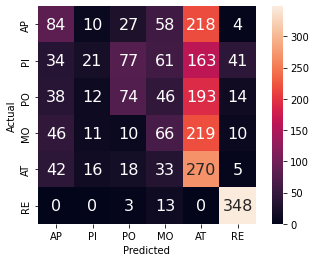

<Figure size 432x288 with 0 Axes>

In [18]:
labels=["AP", "PI", "PO", "MO", "AT", "RE"] #Con Reposo
#labels=["AP", "PI", "PO", "MO", "AT"] #Sin Reposo
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, square=True, cbar=True, fmt='g')
ax.set_ylim(0, 6) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis() 
plt.show()
plt.savefig(r'SVM_P6.png', transparent = False, bbox_inches = 'tight')

# **Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1 : ', "%.2f" % (precision*100))
print('Recall_Score: ', "%.2f" % (recall*100))
print('Precision : ', "%.2f" % (f1*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# **All-to-one**

In [19]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV

In [20]:
csv_files = glob.glob(r'C:\Users\hpalm\Desktop\Programacion\Datos_6000_MYO\Caracteristicas\*.csv')

dataframes =[]

In [21]:
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)

In [22]:
all_to_one_df = pd.concat(dataframes, ignore_index=True)


all_to_one_df.sort_values(by=all_to_one_df.columns[6],inplace=True)


all_to_one_df.reset_index(drop=True,inplace=True)

In [23]:
all_to_one_df

,MAV,WL,ZC,RMS,SSI,VAR,Label
0,0.127188,10.500000,28,0.174986,1.531006,0.030615,0
1,0.057656,4.195312,18,0.086412,0.373352,0.007376,0
2,0.082031,6.835938,30,0.140707,0.989929,0.019758,0
3,0.093281,7.632812,25,0.138821,0.963562,0.019230,0
4,0.053125,4.242188,28,0.076355,0.291504,0.005724,0
...,...,...,...,...,...,...,...
114235,0.017344,1.296875,19,0.022290,0.024841,0.000418,5
114236,0.010781,0.531250,2,0.013755,0.009460,0.000080,5
114237,0.011875,0.695312,10,0.015149,0.011475,0.000173,5
114238,0.031563,2.640625,24,0.039467,0.077881,0.001475,5


# **SVM**

In [24]:
X = all_to_one_df.iloc[:,0:5]    # features matrix 
y = all_to_one_df.iloc[:,[6]]       # target variable

In [25]:
X

,MAV,WL,ZC,RMS,SSI
0,0.127188,10.500000,28,0.174986,1.531006
1,0.057656,4.195312,18,0.086412,0.373352
2,0.082031,6.835938,30,0.140707,0.989929
3,0.093281,7.632812,25,0.138821,0.963562
4,0.053125,4.242188,28,0.076355,0.291504
...,...,...,...,...,...
114235,0.017344,1.296875,19,0.022290,0.024841
114236,0.010781,0.531250,2,0.013755,0.009460
114237,0.011875,0.695312,10,0.015149,0.011475
114238,0.031563,2.640625,24,0.039467,0.077881


In [26]:
# load one patients for testing
data_p = pd.read_csv(r"C:\Users\hpalm\Desktop\Programacion\Datos_6000_MYO\Caracteristicas\P10_Mejores_Caracteristicas.csv")



X_p = data_p.iloc[:,0:5]    # features matrix 
y_p = data_p.iloc[:,[6]]       # target variable

In [27]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_p = sc.transform(X_p)
#X_val = sc.transform(X_val)

In [ ]:
svc = SVC(gamma='scale')
dictionary = {'kernel':['sigmoid', 'rbf', 'poly'], 'C':[0.5,1,2,3], 'degree':[2,3,4,5]}
grid = GridSearchCV(svc, dictionary)
grid.fit(X, y)
grid.best_estimator_

In [28]:
svm_model = SVC(kernel='poly', C=3, degree=2)

# Train the model on the training data
svm_model.fit(X, y)

c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=3, degree=2, kernel='poly')

In [29]:
# Predict on the testing data
y_pred = svm_model.predict(X_p)

# Calculate accuracy
accuracy = accuracy_score(y_p, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.31941526610644255


# **Confusion Matrix**

In [30]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming clf is your trained SVM model and X_test, y_test are your test data and labels, respectively
cm = confusion_matrix(y_p, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(6)],
                  columns = [i for i in range(6)])

In [ ]:
labels=["AP", "PI", "PO", "MO", "AT", "RE"] #Con Reposo
#labels=["AP", "PI", "PO", "MO", "AT"] #Sin Reposo
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, square=True, cbar=True, fmt='g')
ax.set_ylim(0, 6) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis() 
plt.show()
plt.savefig(r'SVM_all_to_one_P10.png', transparent = False, bbox_inches = 'tight')

# **Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


precision = precision_score(y_p, y_pred, average='weighted')
recall = recall_score(y_p, y_pred, average='weighted')
f1 = f1_score(y_p, y_pred, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1 : ', "%.2f" % (precision*100))
print('Recall_Score: ', "%.2f" % (recall*100))
print('Precision : ', "%.2f" % (f1*100))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_p, y_pred))